In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Data set: sklearn diabetes
    
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2] #use only one feature
y = y.reshape(len(y),1)
X = StandardScaler().fit_transform(X)

In [3]:
# Split the data into training/testing sets
split_index = np.random.randint(0, 442, 42)

x_train = np.array([X[i] for i in range(442) if i not in split_index])
x_test = np.array(X[split_index])

y_train = np.array([y[i] for i in range(442) if i not in split_index])
y_test = np.array(y[split_index])

print("Covariates dimensionality:", x_train.shape) 
print("Response dimensionality:", y_train.shape)

Covariates dimensionality: (401, 1)
Response dimensionality: (401, 1)


In [4]:
input_size = 1
output_size = 1
num_epochs = 300 #The maximum number of times the program can iterate over the entire dataset in one train() 
learning_rate = 0.01

In [5]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [6]:
# Loss and Optimizer
criterion = nn.MSELoss() #Linear regression loss function -> MSE
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
# Model training

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.Tensor(x_train)
    targets = torch.Tensor(y_train)
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/300], Loss: 25252.9883
Epoch [10/300], Loss: 21341.4023
Epoch [15/300], Loss: 18149.8379
Epoch [20/300], Loss: 15545.7461
Epoch [25/300], Loss: 13420.9854
Epoch [30/300], Loss: 11687.3164
Epoch [35/300], Loss: 10272.7451
Epoch [40/300], Loss: 9118.5391
Epoch [45/300], Loss: 8176.7681
Epoch [50/300], Loss: 7408.3311
Epoch [55/300], Loss: 6781.3223
Epoch [60/300], Loss: 6269.7090
Epoch [65/300], Loss: 5852.2549
Epoch [70/300], Loss: 5511.6265
Epoch [75/300], Loss: 5233.6846
Epoch [80/300], Loss: 5006.8926
Epoch [85/300], Loss: 4821.8364
Epoch [90/300], Loss: 4670.8345
Epoch [95/300], Loss: 4547.6196
Epoch [100/300], Loss: 4447.0781
Epoch [105/300], Loss: 4365.0381
Epoch [110/300], Loss: 4298.0938
Epoch [115/300], Loss: 4243.4678
Epoch [120/300], Loss: 4198.8921
Epoch [125/300], Loss: 4162.5190
Epoch [130/300], Loss: 4132.8374
Epoch [135/300], Loss: 4108.6177
Epoch [140/300], Loss: 4088.8545
Epoch [145/300], Loss: 4072.7271
Epoch [150/300], Loss: 4059.5667
Epoch [155/300], Loss: 

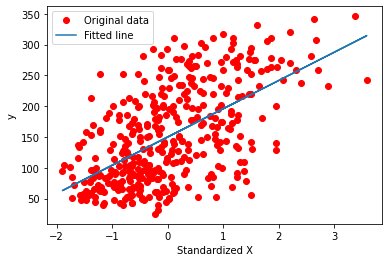

In [8]:
# Graph

# Convert x_train to a PyTorch tensor with the same data type as used during training
predicted = model(torch.from_numpy(x_train).to(torch.float32)).detach().numpy()

plt.plot(x_train, y_train, 'ro', label='Original data')
plt.xlabel("Standardized X")
plt.ylabel("y")
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [9]:
Beta = model.weight.data.numpy()
Intercept = model.bias.data.numpy()
print("Beta:", Beta)
print("Intercept:", Intercept)

Beta: [[45.87899]]
Intercept: [149.95544]


In [10]:
y_hat = model(torch.from_numpy(x_test).to(torch.float32)).detach().numpy()

In [11]:
# The coefficients
print("Coefficients: \n", Beta)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_hat))

Coefficients: 
 [[45.87899]]
Mean squared error: 2881.02
Coefficient of determination (R^2): 0.25


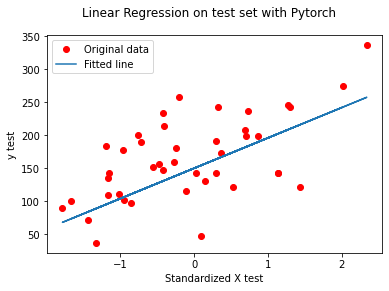

In [12]:
plt.plot(x_test, y_test, 'ro', label='Original data')
plt.suptitle("Linear Regression on test set with Pytorch")
plt.xlabel("Standardized X test")
plt.ylabel("y test")
plt.plot(x_test, y_hat, label='Fitted line')
plt.legend()
plt.show()

### Repeat on Sklearn

inspired from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients: 
 [[45.96121871]]
Mean squared error: 2870.25
Coefficient of determination (R^2): 0.25


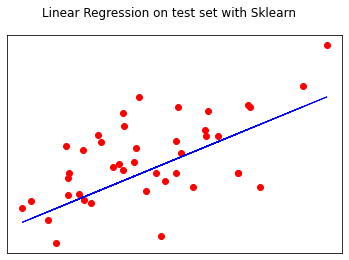

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color="blue", linewidth=1)
plt.suptitle("Linear Regression on test set with Sklearn")
plt.xticks(())
plt.yticks(())

plt.show()

By using Scikit-Learn and Pytorch we got analogous results